# Introduction

### Purpose
Build a multiple linear regression model for the prediction of demand for shared bikes.

### Requirements
The model must be usable by the management of the bike sharing company to understand the drivers of demand.  Such understanding may enable the business to manipulate the business strategy accordingly and to understand the demand dynamics of new markets.

## 1. Understand the Data

### Import the Libraries

In [110]:
# Import the required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
import statsmodels.stats.api as stats_api
from statsmodels.compat import lzip

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

### Import the Dataset

In [2]:
# Load the dataset
#bike = pd.read_csv('C:/development/python/Bike Sharing Case Study/day.csv')
bike = pd.read_csv('https://ml-course2-upgrad.s3.amazonaws.com/Linear+Regression+Assignment/Bike+Sharing+Assignment/day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Check the size of the dataframe
bike.shape

(730, 16)

In [4]:
# Check the range of the values
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# Check the data types
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Perform the Initial Cleanup of the Dataset

In [6]:
# Remove the predicted variables 'casual' and 'registered'
bike.drop(['casual', 'registered'], axis=1, inplace=True)
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
# Replace the encoded weather values with meaningful category names
bike['Weather'] = bike['weathersit'].replace({1:'Clear or Partly Cloudy', 2:'Mist', 3:'Light Rain or Snow', 4:'Heavy Rain or Snow'})
bike.drop('weathersit', axis=1, inplace=True)

In [8]:
# Replace the encoded month values with meaningful category names
bike['Month'] = bike['mnth'].replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})
bike.drop('mnth', axis=1, inplace=True)

In [9]:
# Replace the encoded weekday values with meaningful category names
bike['Weekday'] = bike['weekday'].replace({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saterday', 6:'Sunday'})
bike.drop('weekday', axis=1, inplace=True)

In [10]:
# Replace the encoded year values with meaningful category names
bike['Year'] = bike['yr'].replace({0:'Year 2018', 1:'Year 2019'})
bike.drop('yr', axis=1, inplace=True)

In [11]:
# Replace the encoded season value with meaningful category names
bike['Season'] = bike['season'].replace({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
bike.drop('season', axis=1, inplace=True)

In [12]:
# Rename the workingday and holiday columns
bike.rename(columns={'workingday':'Working Day', 'holiday':'Holiday'}, inplace=True)

In [13]:
# Rename the remaining columns for clarity and consistency
bike.rename(columns={'instant':'Instant', 'temp':'Temperature', 'atemp':'Apparent Temperature', 'hum':'Humidity', 'windspeed':'Wind Speed', 'cnt':"Count"}, inplace=True)

### Find the Value Counts for Categorical Variables

In [14]:
# Get the value counts for the weather categories
bike['Weather'].value_counts()

Clear or Partly Cloudy    463
Mist                      246
Light Rain or Snow         21
Name: Weather, dtype: int64

#### Observations and Notes
- There are very few records with light rain or snow
- There are no records with hard rain or snow

In [15]:
# Get the value counts for the month categories
bike['Month'].value_counts()

January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: Month, dtype: int64

In [16]:
# Get the value counts for the weekday categories
bike['Weekday'].value_counts()

Sunday       105
Monday       105
Tuesday      105
Wednesday    104
Friday       104
Saterday     104
Thursday     103
Name: Weekday, dtype: int64

In [17]:
# Get the value counts for the year categories
bike['Year'].value_counts()

Year 2018    365
Year 2019    365
Name: Year, dtype: int64

In [18]:
# Get the value counts for the season categories
bike['Season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: Season, dtype: int64

In [19]:
# Get the value counts for the working day categories
bike['Working Day'].value_counts()

1    499
0    231
Name: Working Day, dtype: int64

In [20]:
# Get the value counts for the holiday categories
bike['Holiday'].value_counts()

0    709
1     21
Name: Holiday, dtype: int64

#### Observations and Notes
- There are very few records in the holiday category

### Plot the Categorical Variables

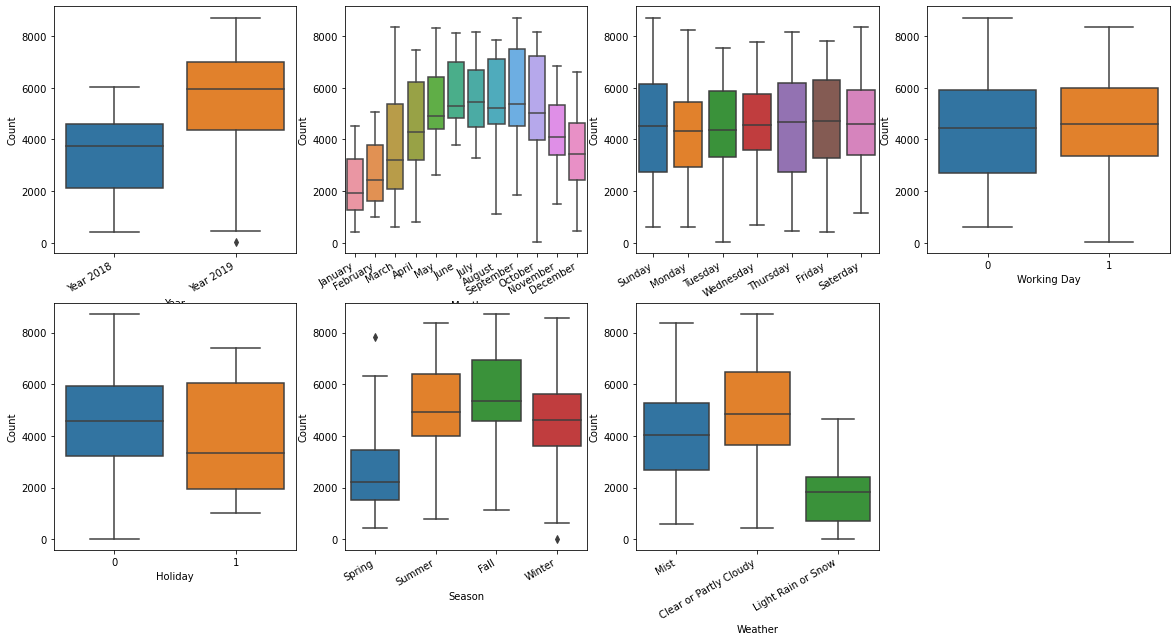

In [21]:
# Use a boxplot to show how the categorical variables relate to the predicted variable 'Count'
plt.figure(figsize = (20,10))

plt.subplot(2,4,1)
sns.boxplot(data=bike, x='Year', y='Count')
plt.xticks(rotation=30, ha='right')

plt.subplot(2,4,2)
sns.boxplot(data=bike, x='Month', y='Count')
plt.xticks(rotation=30, ha='right')

plt.subplot(2,4,3)
sns.boxplot(data=bike, x='Weekday', y='Count')
plt.xticks(rotation=30, ha='right')

plt.subplot(2,4,4)
sns.boxplot(data=bike, x='Working Day', y='Count')

plt.subplot(2,4,5)
sns.boxplot(data=bike, x='Holiday', y='Count')

plt.subplot(2,4,6)
sns.boxplot(data=bike, x='Season', y='Count')
plt.xticks(rotation=30, ha='right')

plt.subplot(2,4,7)
sns.boxplot(data=bike, x='Weather', y='Count')
plt.xticks(rotation=30, ha='right')

plt.show()

#### Observations and Notes
- There is a large increase in rentals from 2018 to 2019
- The median number of rentals are similar for all days of the week so we may need to drop this variable
- The median number of rentals are similar for working an non-working days so we may need to drop this variable
- Rentals are markably lower in the spring season and somewhat lower during winter
- The seasons category and month category will be collinear so we will need to drop one of these
- Rentals are markably lower when there is light rain or snow and somewhat lower when it is misty

### Plot the Quantitative Variables

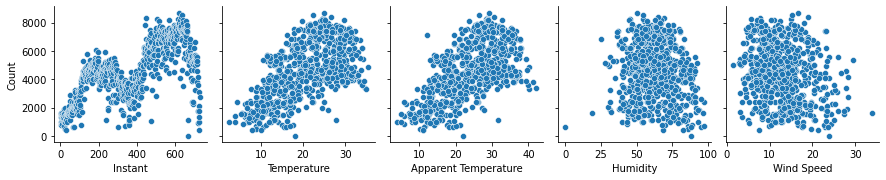

In [22]:
# Create a pair plot to show the relationships between quantitative variables and the target variable
sns.pairplot(bike, x_vars=['Instant', 'Temperature', 'Apparent Temperature', 'Humidity', 'Wind Speed'], y_vars='Count')
plt.show()

#### Observations and Notes
- The instant variable may be better represented by the year category
- There is a linear relationship with temperature and apparent temperature but they are collinear

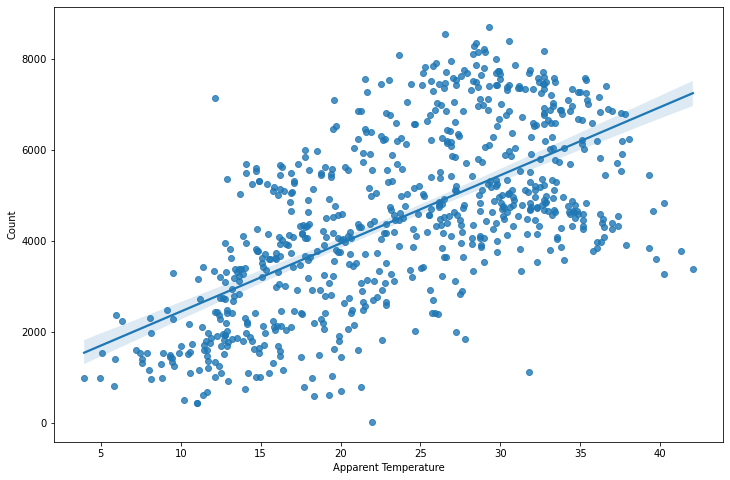

In [85]:
# Create a regression plot to show the relationships between Apparent Temperature and the target variable Count
plt.figure(figsize = (12,8))
sns.regplot(x=bike['Apparent Temperature'], y=bike['Count'])
plt.show()

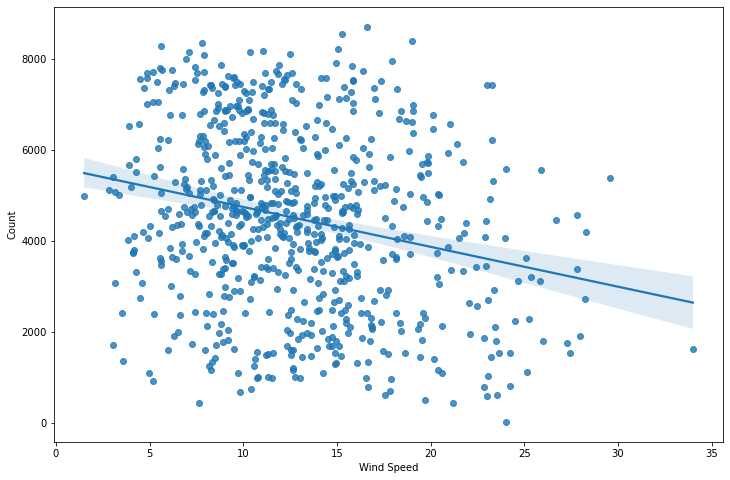

In [84]:
# Create a regression plot to show the relationships between Wind Speed and the target variable Count
plt.figure(figsize = (12,8))
sns.regplot(x=bike['Wind Speed'], y=bike['Count'])
plt.show()

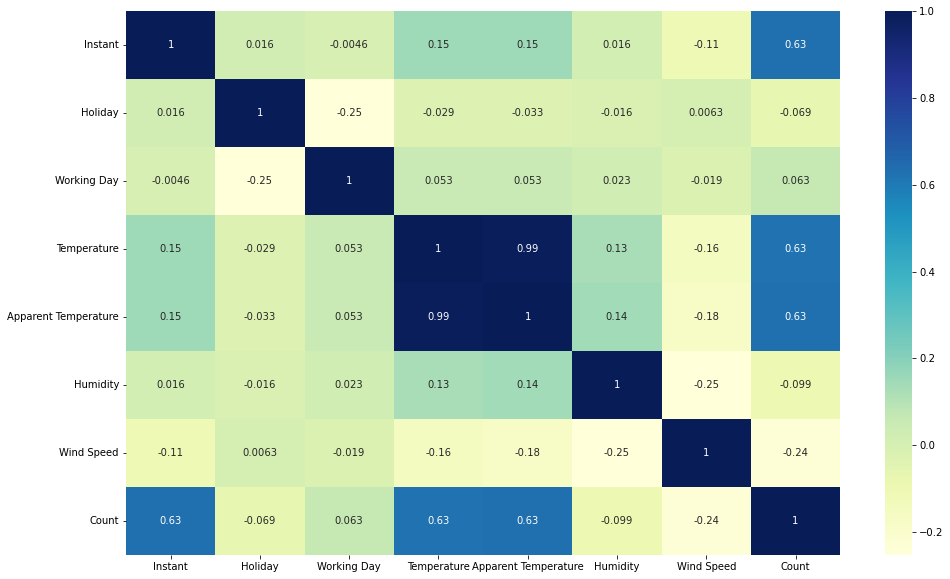

In [23]:
# Compute the correlations between quatitative variables and plot as a heatmap
plt.figure(figsize = (16,10))
sns.heatmap(bike.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [24]:
bike.corr()

,Instant,Holiday,Working Day,Temperature,Apparent Temperature,Humidity,Wind Speed,Count
Instant,1.000000,0.016275,-0.004619,0.150738,0.152773,0.016080,-0.112667,0.629896
Holiday,0.016275,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
Working Day,-0.004619,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
Temperature,0.150738,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
Apparent Temperature,0.152773,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
Humidity,0.016080,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
Wind Speed,-0.112667,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
Count,0.629896,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


#### Observations and Notes
- Temperature and apparent temperature are highly correlated and represent the same information

## 2. Prepare the Data for Modelling

### Remove Variables that Duplicate Information

In [25]:
# Drop the 'Temperature' variable
bike.drop('Temperature', axis=1, inplace=True)

In [26]:
# Drop the 'Instant' variable
bike.drop('Instant', axis=1, inplace=True)

In [27]:
# Drop the 'Instant' variable
bike.drop('dteday', axis=1, inplace=True)

### Convert Categorical Fields to Dummy Variables

In [28]:
# Convert the 'Season' variable to dummy variables
seasons = pd.get_dummies(bike['Season'])
seasons.drop('Summer', axis=1, inplace=True)
bike = pd.concat([bike, seasons], axis=1)
bike.drop('Season', axis=1, inplace=True)

In [29]:
# Convert the 'Weather' variable to dummy variables
weather = pd.get_dummies(bike['Weather'])
weather.drop('Clear or Partly Cloudy', axis=1, inplace=True)
bike = pd.concat([bike, weather], axis=1)
bike.drop('Weather', axis=1, inplace=True)

In [30]:
# Convert the 'Year' variable to dummy variable named Operational Years
year = pd.get_dummies(bike['Year'])
year.drop('Year 2018', axis=1, inplace=True)
bike = pd.concat([bike, year], axis=1)
bike.drop('Year', axis=1, inplace=True)
bike.rename(columns = {'Year 2019':'Operational Years'}, inplace = True)

In [31]:
# Convert the 'Weekday' variable to dummy variables
weekday = pd.get_dummies(bike['Weekday'])
weekday.drop('Monday', axis=1, inplace=True)
bike = pd.concat([bike, weekday], axis=1)
bike.drop('Weekday', axis=1, inplace=True)

In [32]:
# Convert the 'Month' variable to dummy variables
month = pd.get_dummies(bike['Month'])
month.drop('January', axis=1, inplace=True)
bike = pd.concat([bike, month], axis=1)
bike.drop('Month', axis=1, inplace=True)

In [33]:
# View the dataframe head
bike.head()

,Holiday,Working Day,Apparent Temperature,Humidity,Wind Speed,Count,Fall,Spring,Winter,Light Rain or Snow,...,August,December,February,July,June,March,May,November,October,September
0,0,0,18.18125,80.5833,10.749882,985,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,17.68695,69.6087,16.652113,801,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,9.47025,43.7273,16.636703,1349,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,10.60610,59.0435,10.739832,1562,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,11.46350,43.6957,12.522300,1600,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# View the column names
list(bike.columns)

['Holiday',
 'Working Day',
 'Apparent Temperature',
 'Humidity',
 'Wind Speed',
 'Count',
 'Fall',
 'Spring',
 'Winter',
 'Light Rain or Snow',
 'Mist',
 'Operational Years',
 'Friday',
 'Saterday',
 'Sunday',
 'Thursday',
 'Tuesday',
 'Wednesday',
 'April',
 'August',
 'December',
 'February',
 'July',
 'June',
 'March',
 'May',
 'November',
 'October',
 'September']

#### Observations and Notes
- Working Day will be correlated with the day of week variables
- The season variables will be correlated with the month variables

### Visualize the Correlation between Variables

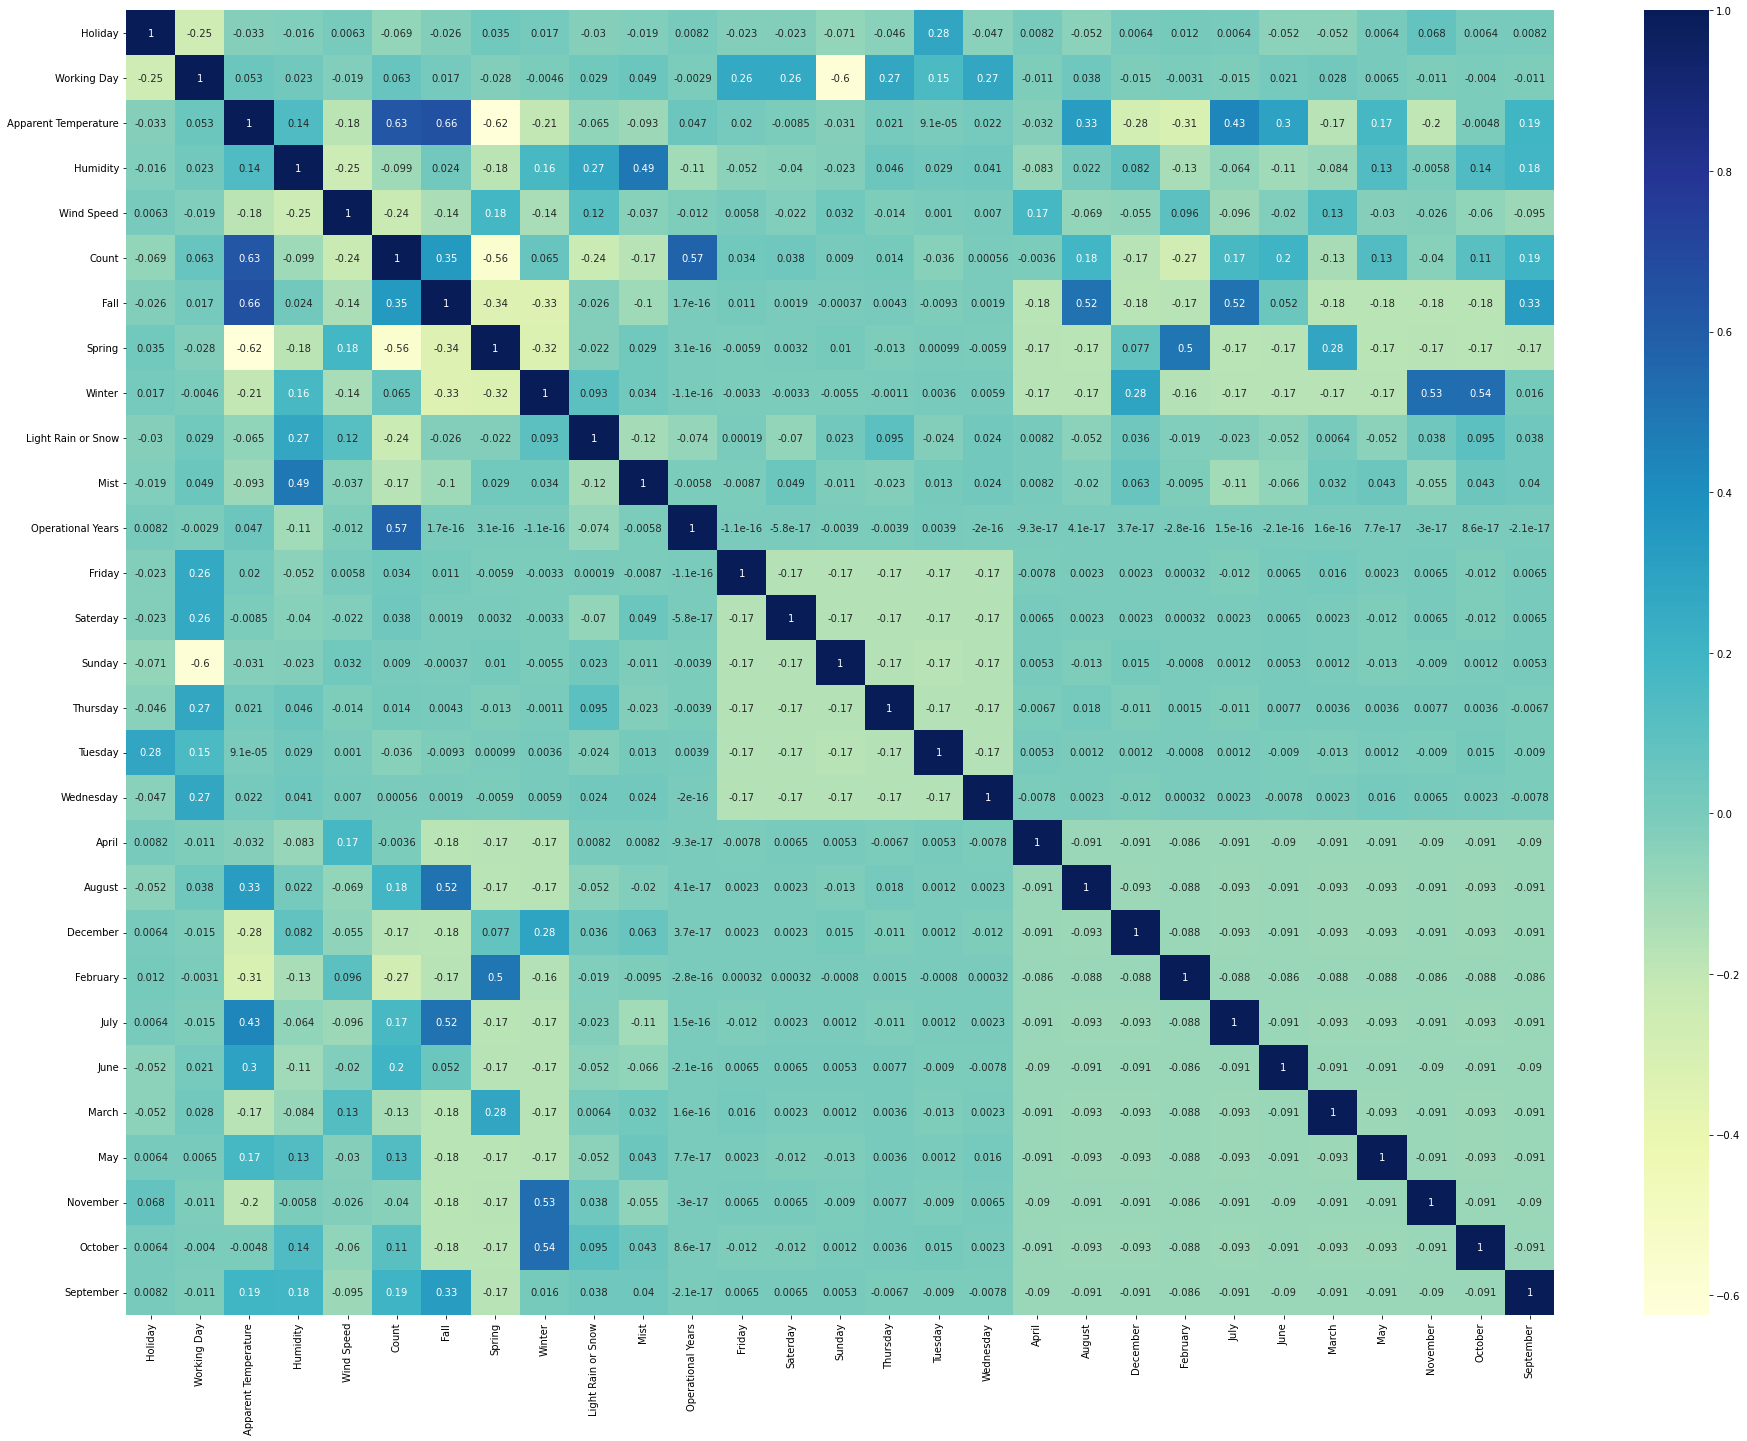

In [35]:
# Compute the correlations between quatitative variables and plot as a heatmap
plt.figure(figsize = (32,24))
sns.heatmap(bike.corr(), annot=True, cmap='YlGnBu')
plt.show()

### Split the Data into a Training Dataset and a Test Dataset

In [36]:
# Split the dataframe
bike_train, bike_test = train_test_split(bike, train_size=0.7, random_state=121)
#565773

In [37]:
# View the training dataframe shape
bike_train.shape

(510, 29)

In [38]:
# View the test dataframe shape
bike_test.shape

(220, 29)

### Normalize the Dataset

In [39]:
# Fit and apply a scaler to the training data
numerical_vars = ['Apparent Temperature', 'Humidity', 'Wind Speed', 'Count']
scaler = MinMaxScaler()
bike_train[numerical_vars] = scaler.fit_transform(bike_train[numerical_vars])
bike_train.describe()

,Holiday,Working Day,Apparent Temperature,Humidity,Wind Speed,Count,Fall,Spring,Winter,Light Rain or Snow,...,August,December,February,July,June,March,May,November,October,September
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.668627,0.514430,0.645135,0.418331,0.503643,0.252941,0.24902,0.247059,0.035294,...,0.078431,0.082353,0.074510,0.090196,0.086275,0.082353,0.084314,0.078431,0.092157,0.072549
std,0.157763,0.471169,0.216811,0.145111,0.192479,0.237623,0.435124,0.43287,0.431725,0.184703,...,0.269113,0.275172,0.262857,0.286744,0.281045,0.275172,0.278131,0.269113,0.289531,0.259649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.326898,0.534704,0.275261,0.341755,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.522261,0.644816,0.395006,0.506039,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.692378,0.750107,0.526796,0.689210,1.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
# Apply the scaler to the test dataset
bike_test[numerical_vars] = scaler.transform(bike_test[numerical_vars])
bike_test.describe()

,Holiday,Working Day,Apparent Temperature,Humidity,Wind Speed,Count,Fall,Spring,Winter,Light Rain or Snow,...,August,December,February,July,June,March,May,November,October,September
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,0.718182,0.529893,0.646016,0.425188,0.495647,0.268182,0.240909,0.236364,0.013636,...,0.100000,0.090909,0.081818,0.072727,0.072727,0.090909,0.086364,0.090909,0.068182,0.104545
std,0.187620,0.450911,0.207308,0.149685,0.197617,0.241307,0.444023,0.428610,0.425817,0.116240,...,0.300684,0.288135,0.274713,0.260281,0.260281,0.288135,0.281541,0.288135,0.252632,0.306665
min,0.000000,0.000000,0.094271,0.193231,0.069989,-0.051639,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.368174,0.536097,0.290428,0.328938,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.542992,0.639293,0.402008,0.506224,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.705652,0.755677,0.530347,0.664037,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.951946,0.997858,1.213032,1.019596,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Separate the Training Data Predictor and Target Variables

In [41]:
# Separate the training dataframe into the X and y dataframes
y_train = bike_train.pop('Count')
X_train = bike_train

## 3. Train the Model

### Check the Variance Inflation Factors

In [42]:
vif = pd.DataFrame()
vif['Factors'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Factors,VIF
0,Holiday,inf
11,Friday,inf
16,Wednesday,inf
15,Tuesday,inf
1,Working Day,inf
12,Saterday,inf
14,Thursday,inf
2,Apparent Temperature,40.04
3,Humidity,29.60
7,Winter,12.84


### Build the Model

In [43]:
# Start to build a model with Operational Years as the only X variable since it has the second highest correlation with Count and a VIF of 2.04
predictors = {'Operational Years'}
X_train_sm = sm.add_constant(X_train[predictors])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     227.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           9.28e-43
Time:                        03:21:50   Log-Likelihood:                 104.14
No. Observations:                 510   AIC:                            -204.3
Df Residuals:                     508   BIC:                            -195.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3690      0.013     29.515      0.000       0.344       0.394
Operational Years     0.2641      0.018     15.086      0.000       0.230       0.299
==============================================================================
Omnibus:                       29.240   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.016
Skew:                          -0.556   Prob(JB):                     3.03e-07
Kurtosis:                       2.579   Cond. No.                         2.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations and Notes
- R-squared of 0.309 is a good start
- p-value is 0.000

In [44]:
# Add Holiday as another X variable
predictors.add('Holiday')
X_train_sm = sm.add_constant(X_train[predictors])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     114.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           1.17e-41
Time:                        03:21:50   Log-Likelihood:                 104.56
No. Observations:                 510   AIC:                            -203.1
Df Residuals:                     507   BIC:                            -190.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3702      0.013     29.440      0.000       0.345       0.395
Operational Years     0.2643      0.018     15.091      0.000       0.230       0.299
Holiday              -0.0503      0.056     -0.906      0.366      -0.159       0.059
==============================================================================
Omnibus:                       29.422   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.277
Skew:                          -0.541   Prob(JB):                     4.39e-07
Kurtosis:                       2.546   Cond. No.                         7.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations and Notes
- Adjusted R-squared of 0.308 shows no improvement
- p-value is 0.366 for Holiday is higher than 0.05
- There are very few Holiday records, making a good fit difficult
- Holiday is not a good variable, so we will drop it

In [45]:
# Remove Holiday and add Working Day as X variable
predictors.remove('Holiday')
predictors.add('Working Day')
X_train_sm = sm.add_constant(X_train[predictors])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     114.7
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           8.29e-42
Time:                        03:21:50   Log-Likelihood:                 104.90
No. Observations:                 510   AIC:                            -203.8
Df Residuals:                     507   BIC:                            -191.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3537      0.018     20.081      0.000       0.319       0.388
Operational Years     0.2641      0.018     15.092      0.000       0.230       0.298
Working Day           0.0228      0.019      1.229      0.220      -0.014       0.059
==============================================================================
Omnibus:                       28.764   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.883
Skew:                          -0.522   Prob(JB):                     8.81e-07
Kurtosis:                       2.528   Cond. No.                         3.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations and Notes
- Adjusted R-squared of 0.309 shows little improvement
- p-value is 0.220 for Working Day is higher than 0.05
- Coefficient for Working Day is only 0.0228
- Working Day explains very little of the variability, so we can drop it

In [46]:
# Remove Working Day and add Mist as another X variable
predictors.remove('Working Day')
predictors.add('Mist')
X_train_sm = sm.add_constant(X_train[predictors])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     126.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           3.27e-45
Time:                        03:21:50   Log-Likelihood:                 112.78
No. Observations:                 510   AIC:                            -219.6
Df Residuals:                     507   BIC:                            -206.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3948      0.014     28.677      0.000       0.368       0.422
Operational Years     0.2626      0.017     15.233      0.000       0.229       0.296
Mist                 -0.0769      0.018     -4.180      0.000      -0.113      -0.041
==============================================================================
Omnibus:                       28.605   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.971
Skew:                          -0.580   Prob(JB):                     1.88e-07
Kurtosis:                       2.664   Cond. No.                         2.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# Add 'Light Rain or Snow' as another X variable
predictors.add('Light Rain or Snow')
X_train_sm = sm.add_constant(X_train[predictors])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     104.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           1.37e-52
Time:                        03:21:50   Log-Likelihood:                 132.54
No. Observations:                 510   AIC:                            -257.1
Df Residuals:                     506   BIC:                            -240.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4151      0.014     30.447      0.000       0.388       0.442
Operational Years      0.2527      0.017     15.160      0.000       0.220       0.285
Mist                  -0.0923      0.018     -5.166      0.000      -0.127      -0.057
Light Rain or Snow    -0.2908      0.046     -6.384      0.000      -0.380      -0.201
==============================================================================
Omnibus:                       29.918   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.708
Skew:                          -0.562   Prob(JB):                     2.15e-07
Kurtosis:                       2.573   Cond. No.                         6.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Add 'Wind Speed' as another X variable
predictors.add('Wind Speed')
X_train_sm = sm.add_constant(X_train[predictors])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     95.11
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           2.89e-60
Time:                        03:21:50   Log-Likelihood:                 152.94
No. Observations:                 510   AIC:                            -295.9
Df Residuals:                     505   BIC:                            -274.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5247      0.021     24.537      0.000       0.483       0.567
Operational Years      0.2581      0.016     16.079      0.000       0.227       0.290
Wind Speed            -0.2708      0.042     -6.486      0.000      -0.353      -0.189
Mist                  -0.0925      0.017     -5.382      0.000      -0.126      -0.059
Light Rain or Snow    -0.2611      0.044     -5.927      0.000      -0.348      -0.175
==============================================================================
Omnibus:                       29.817   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.851
Skew:                          -0.565   Prob(JB):                     2.00e-07
Kurtosis:                       2.583   Cond. No.                         7.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations and Notes
- Adjusted R-squared of 0.425 shows some improvement
- p-value is much lower than 0.05 for all variables

In [49]:
# Add Spring as another X variable
predictors.add('Spring')
X_train_sm = sm.add_constant(X_train[predictors])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     271.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.66e-140
Time:                        03:21:50   Log-Likelihood:                 342.59
No. Observations:                 510   AIC:                            -673.2
Df Residuals:                     504   BIC:                            -647.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5503      0.015     37.190      0.000       0.521       0.579
Operational Years      0.2613      0.011     23.580      0.000       0.239       0.283
Wind Speed            -0.1588      0.029     -5.435      0.000      -0.216      -0.101
Spring                -0.3045      0.013    -23.586      0.000      -0.330      -0.279
Mist                  -0.0853      0.012     -7.189      0.000      -0.109      -0.062
Light Rain or Snow    -0.2781      0.030     -9.147      0.000      -0.338      -0.218
==============================================================================
Omnibus:                       51.374   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.501
Skew:                          -0.592   Prob(JB):                     5.52e-23
Kurtosis:                       4.850   Cond. No.                         7.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Add Winter as another X variable
predictors.add('Winter')
X_train_sm = sm.add_constant(X_train[predictors])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     241.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.25e-144
Time:                        03:21:50   Log-Likelihood:                 355.63
No. Observations:                 510   AIC:                            -697.3
Df Residuals:                     503   BIC:                            -667.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5784      0.015     37.456      0.000       0.548       0.609
Operational Years      0.2608      0.011     24.126      0.000       0.240       0.282
Wind Speed            -0.1770      0.029     -6.162      0.000      -0.233      -0.121
Spring                -0.3258      0.013    -24.565      0.000      -0.352      -0.300
Mist                  -0.0810      0.012     -6.977      0.000      -0.104      -0.058
Light Rain or Snow    -0.2614      0.030     -8.758      0.000      -0.320      -0.203
Winter                -0.0687      0.013     -5.135      0.000      -0.095      -0.042
==============================================================================
Omnibus:                       41.621   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.334
Skew:                          -0.475   Prob(JB):                     1.79e-19
Kurtosis:                       4.778   Cond. No.                         7.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Add Fall as another X variable
predictors.add('Fall')
X_train_sm = sm.add_constant(X_train[predictors])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     216.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          4.29e-147
Time:                        03:21:50   Log-Likelihood:                 364.25
No. Observations:                 510   AIC:                            -712.5
Df Residuals:                     502   BIC:                            -678.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5384      0.018     29.928      0.000       0.503       0.574
Operational Years      0.2611      0.011     24.538      0.000       0.240       0.282
Wind Speed            -0.1587      0.029     -5.547      0.000      -0.215      -0.102
Spring                -0.2954      0.015    -19.738      0.000      -0.325      -0.266
Fall                   0.0628      0.015      4.156      0.000       0.033       0.092
Mist                  -0.0782      0.011     -6.837      0.000      -0.101      -0.056
Light Rain or Snow    -0.2661      0.029     -9.052      0.000      -0.324      -0.208
Winter                -0.0362      0.015     -2.366      0.018      -0.066      -0.006
==============================================================================
Omnibus:                       38.603   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.363
Skew:                          -0.404   Prob(JB):                     3.94e-20
Kurtosis:                       4.885   Cond. No.                         8.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations and Notes
- Adjusted R-squared of 0.748 is good for 8 variables
- p-value is significantly lower than 0.05 for all variables

In [52]:
## Check the VIFs
vif = pd.DataFrame()
X = X_train[predictors]
vif['Factors'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Factors,VIF
1,Wind Speed,3.06
0,Operational Years,1.90
2,Spring,1.69
6,Winter,1.49
3,Fall,1.47
4,Mist,1.44
5,Light Rain or Snow,1.09


In [53]:
# Add Apparent Temperature as another X variable
predictors.add('Apparent Temperature')
X_train_sm = sm.add_constant(X_train[predictors])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     273.7
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.98e-177
Time:                        03:21:50   Log-Likelihood:                 438.37
No. Observations:                 510   AIC:                            -858.7
Df Residuals:                     501   BIC:                            -820.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2338      0.028      8.308      0.000       0.178       0.289
Operational Years        0.2478      0.009     26.747      0.000       0.230       0.266
Apparent Temperature     0.4878      0.038     13.000      0.000       0.414       0.561
Wind Speed              -0.1048      0.025     -4.174      0.000      -0.154      -0.055
Spring                  -0.1471      0.017     -8.524      0.000      -0.181      -0.113
Fall                    -0.0162      0.014     -1.123      0.262      -0.045       0.012
Mist                    -0.0744      0.010     -7.504      0.000      -0.094      -0.055
Light Rain or Snow      -0.2485      0.025     -9.752      0.000      -0.299      -0.198
Winter                   0.0411      0.015      2.827      0.005       0.013       0.070
==============================================================================
Omnibus:                       71.370   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.445
Skew:                          -0.716   Prob(JB):                     1.78e-39
Kurtosis:                       5.520   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
## Check the VIFs
vif = pd.DataFrame()
X = X_train[predictors]
vif['Factors'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Factors,VIF
1,Apparent Temperature,6.41
2,Wind Speed,4.61
4,Fall,2.49
0,Operational Years,2.08
3,Spring,1.74
7,Winter,1.57
5,Mist,1.49
6,Light Rain or Snow,1.09


#### Observations and Notes
- VIF for Apparent Temperature is more than 5
- Let's see if we should keep Temperature instead of the seasons, since Temperature is a good proxy for season

In [55]:
# Remove the seasons X variables
predictors.remove('Winter')
predictors.remove('Fall')
predictors.remove('Spring')
X_train_sm = sm.add_constant(X_train[predictors])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     294.9
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          4.25e-147
Time:                        03:21:50   Log-Likelihood:                 358.46
No. Observations:                 510   AIC:                            -704.9
Df Residuals:                     504   BIC:                            -679.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1446      0.021      6.924      0.000       0.104       0.186
Operational Years        0.2425      0.011     22.539      0.000       0.221       0.264
Apparent Temperature     0.6306      0.025     24.988      0.000       0.581       0.680
Wind Speed              -0.1406      0.028     -4.947      0.000      -0.196      -0.085
Mist                    -0.0689      0.012     -5.968      0.000      -0.092      -0.046
Light Rain or Snow      -0.2196      0.030     -7.441      0.000      -0.278      -0.162
==============================================================================
Omnibus:                       15.738   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.664
Skew:                          -0.360   Prob(JB):                     0.000146
Kurtosis:                       3.560   Cond. No.                         9.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations and Notes
- Apparent Temperature is a as good a predictor the season categorical dummy variables
- p-value is very low for all predictor variables, suggesting that the model has strong statistical significance

In [56]:
## Check the VIFs
vif = pd.DataFrame()
X = X_train[predictors]
vif['Factors'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Factors,VIF
2,Wind Speed,3.35
1,Apparent Temperature,3.27
0,Operational Years,1.99
3,Mist,1.42
4,Light Rain or Snow,1.07


In [57]:
# Add Humidity as another X variable
predictors.add('Humidity')
X_train_sm = sm.add_constant(X_train[predictors])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     249.4
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          3.26e-147
Time:                        03:21:50   Log-Likelihood:                 361.67
No. Observations:                 510   AIC:                            -709.3
Df Residuals:                     503   BIC:                            -679.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2208      0.037      6.026      0.000       0.149       0.293
Humidity                -0.1254      0.050     -2.525      0.012      -0.223      -0.028
Wind Speed              -0.1633      0.030     -5.505      0.000      -0.222      -0.105
Operational Years        0.2392      0.011     22.184      0.000       0.218       0.260
Light Rain or Snow      -0.1818      0.033     -5.513      0.000      -0.247      -0.117
Apparent Temperature     0.6460      0.026     25.008      0.000       0.595       0.697
Mist                    -0.0485      0.014     -3.456      0.001      -0.076      -0.021
==============================================================================
Omnibus:                       17.180   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.893
Skew:                          -0.370   Prob(JB):                     4.79e-05
Kurtosis:                       3.624   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
## Check the VIFs
vif = pd.DataFrame()
X = X_train[predictors]
vif['Factors'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Factors,VIF
0,Humidity,12.30
4,Apparent Temperature,7.06
1,Wind Speed,4.16
2,Operational Years,2.01
5,Mist,1.99
3,Light Rain or Snow,1.21


#### Observations and Notes
- No significant increase in the Adjusted R-squared after adding Humidity
- VIF is higher than 5 for Humidity and Apparent Temperature
- We shouldn't keep Humidity

In [59]:
# Remove the Humidity as X variable
predictors.remove('Humidity')
X_train_sm = sm.add_constant(X_train[predictors])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     294.9
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          4.25e-147
Time:                        03:21:51   Log-Likelihood:                 358.46
No. Observations:                 510   AIC:                            -704.9
Df Residuals:                     504   BIC:                            -679.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1446      0.021      6.924      0.000       0.104       0.186
Wind Speed              -0.1406      0.028     -4.947      0.000      -0.196      -0.085
Operational Years        0.2425      0.011     22.539      0.000       0.221       0.264
Light Rain or Snow      -0.2196      0.030     -7.441      0.000      -0.278      -0.162
Apparent Temperature     0.6306      0.025     24.988      0.000       0.581       0.680
Mist                    -0.0689      0.012     -5.968      0.000      -0.092      -0.046
==============================================================================
Omnibus:                       15.738   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.664
Skew:                          -0.360   Prob(JB):                     0.000146
Kurtosis:                       3.560   Cond. No.                         9.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
## Check the VIFs
vif = pd.DataFrame()
X = X_train[predictors]
vif['Factors'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Factors,VIF
0,Wind Speed,3.35
3,Apparent Temperature,3.27
1,Operational Years,1.99
4,Mist,1.42
2,Light Rain or Snow,1.07


#### Observations and Notes
- R-squared of 0.745 is fairly good for only 5 predictor variables
- Adjusted R-squared of 0.743 is close to R-Squared of 0.745
- p-value is 0.000 (way below 0.05) for all predictor variables
- VIF is below 5 for all predictor variables
- The F-Statistic is 294.9
- This looks like a good model given the small dataset
- The model is explainable
- Adding additional predictor variables may result overfitting

## 4. Residual Analysis

### Inspect the Training Dataset Residuals

In [61]:
# Compute the residuals of the training dataframe
y_train_pred = lr_model.predict(X_train_sm)
train_residuals = y_train - y_train_pred
train_residuals.describe()

count    5.100000e+02
mean     1.030766e-16
std      1.199327e-01
min     -4.181549e-01
25%     -7.774041e-02
50%      5.498789e-03
75%      8.144231e-02
max      3.778044e-01
dtype: float64

#### Observations and Notes
- Residuals are centerd at zero
- Standard deviation is relatively low

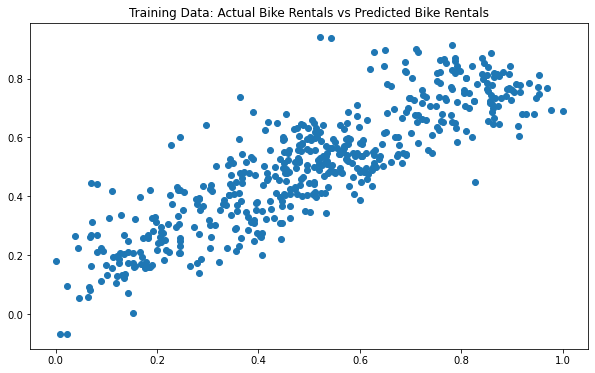

In [62]:
# Plot the actual trainng data against the predicted training data
plt.figure(figsize=(10,6))
plt.scatter(y_train, y_train_pred)
plt.title('Training Data: Actual Bike Rentals vs Predicted Bike Rentals')
plt.show()

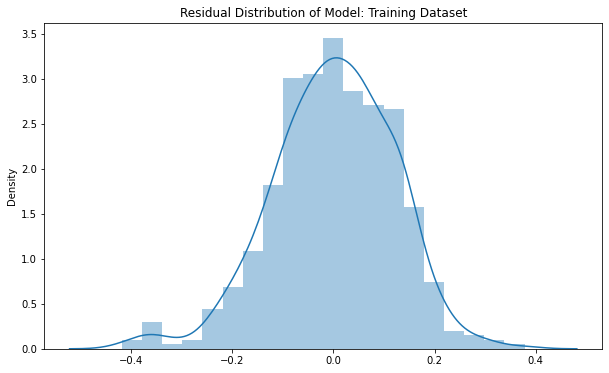

In [63]:
## Plot the residuals
plt.figure(figsize=(10,6))
sns.distplot(train_residuals)
plt.title('Residual Distribution of Model: Training Dataset')
plt.show()

#### Observations and Notes
- Distribution of residuals represents a normal distribution
- There is a long tail around -0.35 but with very few data points

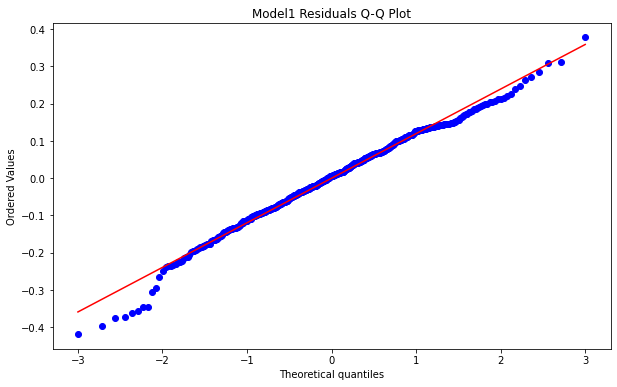

In [101]:
# Use a quantile-quantile plot to visualize the distribution of the resisduals
plt.figure(figsize=(10,6))
stats.probplot(lr_model.resid, dist="norm", plot= plt)
plt.title("Model1 Residuals Q-Q Plot")
plt.show()

#### Observations and Notes
- The points mostly follow a straight line, except for some skewness below -2
- The left skewness is also evident in the long left tail of the propability distribution plot

### Check for Autocorrelation in the Residuals

In [96]:
# Compute the Durbin–Watson statistic for the model
durbin_watson(lr_model.resid)

1.8284893412545682

#### Observations and Notes
- The Durbin–Watson statistic is fairly close to the ideal value of 2, and within the acceptable range of 1.5 to 2.5

### Check for Heteroscedasticity

In [113]:
test_name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = stats_api.het_breuschpagan(lr_model.resid, lr_model.model.exog)
lzip(test_name, test)

[('Lagrange multiplier statistic', 26.413267522500263),
 ('p-value', 7.418594280547449e-05),
 ('f-value', 5.505646014372213),
 ('f p-value', 6.013936329555957e-05)]

#### Observations and Notes
- The p-value that the for the Breusch-Pagan test is 0.00005, and therefore the null hypothesis of homoscedasticity is not rejected.
- The f-statistic of the hypothesis that the error variance does not depend on x, is 5.50 and its corresponding p-value is 0.00006.

## 5. Evaluate the Model

### Separate the Test Data Predictor and Target Variables

In [64]:
# Separate the test dataframe into the X and y dataframes
y_test = bike_test.pop('Count')
X_test = bike_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,Holiday,Working Day,Apparent Temperature,Humidity,Wind Speed,Fall,Spring,Winter,Light Rain or Snow,...,August,December,February,July,June,March,May,November,October,September
212,1.0,0,1,0.819376,0.566409,0.335911,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
680,1.0,1,0,0.520215,0.762640,0.377924,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
568,1.0,0,1,0.801951,0.713796,0.290813,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
462,1.0,0,0,0.542585,0.283633,0.525664,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489,1.0,0,0,0.663587,0.778064,0.326596,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [65]:
# Remove the unused columns
intersection_columns = X_train_sm.columns & X_test_sm.columns
X_test_sm = X_test_sm[intersection_columns]
X_test_sm

,const,Wind Speed,Operational Years,Light Rain or Snow,Apparent Temperature,Mist
212,1.0,0.335911,0,0,0.819376,0
680,1.0,0.377924,1,0,0.520215,0
568,1.0,0.290813,1,0,0.801951,0
462,1.0,0.525664,1,0,0.542585,0
489,1.0,0.326596,1,0,0.663587,1
...,...,...,...,...,...,...
716,1.0,0.497676,1,0,0.434008,0
36,1.0,0.298608,0,0,0.279068,0
708,1.0,0.419913,1,0,0.467961,1
431,1.0,1.048234,1,0,0.584824,0


### Evaluate the Model against the Test Dataset

In [66]:
# Perform predictions agsint the test data
y_test_pred = lr_model.predict(X_test_sm)

In [67]:
# Compute the test data residuals
test_residuals = y_test - y_test_pred
test_residuals.describe()

count    220.000000
mean      -0.011026
std        0.121462
min       -0.399284
25%       -0.076079
50%       -0.014404
75%        0.080800
max        0.292163
dtype: float64

In [68]:
# Compute the coefficient of determination regression score
r2_score(y_true = y_test, y_pred = y_test_pred)

0.7445420273412944

#### Observations and Notes
- R-squared score for the test dataset is 0.744 compared to the training dataset at 0.745
- The alignment of R-squared scores suggests a well performing model with no overfitting

### Visualize the Performance of the Model

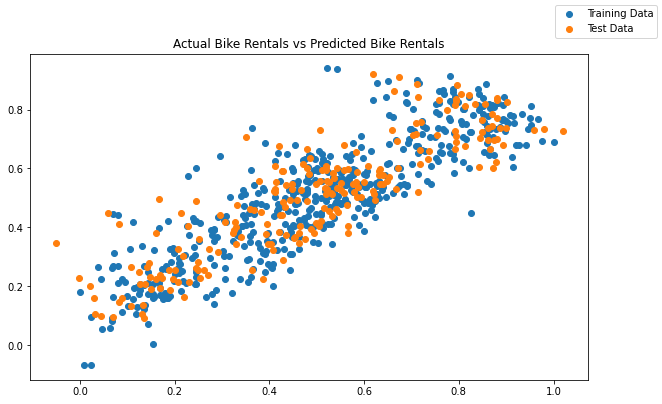

In [69]:
# Plot the actual test data against the predicted test data
fig = plt.figure(figsize=(10,6))
plt.scatter(y_train, y_train_pred)
plt.scatter(y_test, y_test_pred)
fig.legend(labels=['Training Data','Test Data'])
plt.title('Actual Bike Rentals vs Predicted Bike Rentals')
plt.show()

#### Observations and Notes
- There are no significant outliers

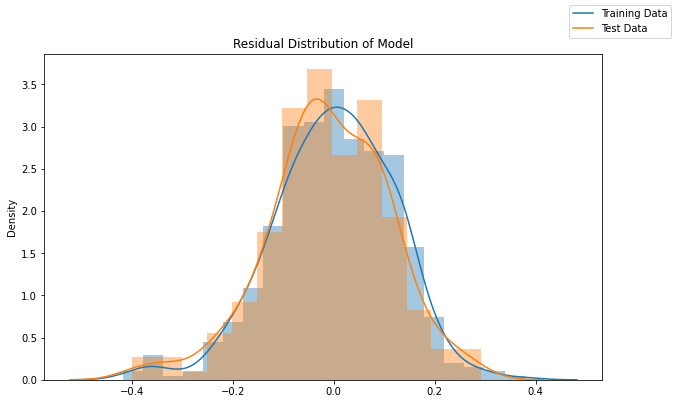

In [70]:
# Plot the training and test data residual distributions
fig = plt.figure(figsize=(10,6))
sns.distplot(train_residuals)
sns.distplot(test_residuals)
plt.title('Residual Distribution of Model')
fig.legend(labels=['Training Data','Test Data'])
plt.show()

#### Observations and Notes
- The distribution of test dataset residuals represents a normal distribution
- The distribution of test dataset residuals align well with that of the training dataset
- Both the training and the test dataset have tails around -0.4 which suggests that there is some variability that is not captured in this model

### Invert the Scale of the Coefficients

In [71]:
inverse_scale = [scaler.scale_[3], scaler.scale_[3], scaler.scale_[3], scaler.scale_[3], scaler.scale_[2], scaler.scale_[0]]
scaled_factors = lr_model.params / inverse_scale
scaled_factors

const                   1173.164366
Wind Speed             -1140.758631
Operational Years       1967.377599
Light Rain or Snow     -1782.068177
Apparent Temperature      16.896428
Mist                      -2.622813
dtype: float64

# Conclusion

### Discussion

The following factors are significant in predicting the demand for shared bikes. The coefficients for these factors are also shown.

| Factor               | Coefficient   |
|----------------------|---------------|
| Apparent Temperature |      0.630648 |
| Operational Years    |      0.242467 |
| Light Rain or Snow   |     -0.219629 |
| Wind Speed           |     -0.140591 |
| Mist                 |     -0.068856 |

The strongest predictor of demand is the apparent temperature.  Apparent temperature is very closely correlated (0.99) with temperature.  Seasonality plays a role in demand, but it is already captured in the apparent temperature factor as the temperature changes with the seasons. Demand decreases when there is light rain or snow, wind, or mist. It may be reasonable to assume that demand will also decrease during heavy rain or snow, but the supplied dataset did not include any records for such weather conditions.

The growth in demand over time is captured in the factor named Operational Years. It represents the increase in demand from the year 2018 to 2019.

The p-values are very low (<0.001) for all predictor variables in this model. This suggests that the model has very strong statistical significance.

This model explains more than 74% of the variability in the bike rentals and does so using only five well-understood predictor variables.  While it may be possible to slightly increase the accuracy of the model by introducing more variables, doing so will likely make the model less understandable and may lead to overfitting of the data.  This model offers relatively good accuracy while being easy to understand and use by the bike rental business for demand forecasting and planning purposes.

### Final Model

The unscaled formula for predicting bike rentals:

```
Rental Count =
1173.16
+ 24.02 * Apparent Temperature
+ 1967.38 * Operational Years
- 1782.06 * Light Rain or Snow
- 3.76 * Wind Speed
- 558.69 * Mist
```